In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 3s 1us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
len(train_images)

60000

In [7]:
len(test_images)

10000

In [8]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [9]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [10]:
test_images

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [11]:
test_images[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  13,  67,   0,
          0,   0,   0,  50,  38,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   8, 120, 209, 226, 247, 237,
        255, 255, 255, 247, 238, 235, 172,  72,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0, 137, 239, 252, 243, 234, 229, 238,
        244, 246, 240, 230, 232, 239, 248, 251, 194,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 102, 255, 231, 228, 227, 228, 233, 230,
        230, 229, 228, 232, 232, 231, 227, 224, 252, 179,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 233, 241, 229, 231, 255, 255, 238, 231,
        227, 238, 246, 228, 230, 227, 234, 235, 229, 241,  20,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 248, 241, 231, 255, 149,  47, 252, 228,
        255, 242, 216, 238, 232, 255, 228, 220, 234, 250,  54,   0,   0,
          0,   0],
       [  

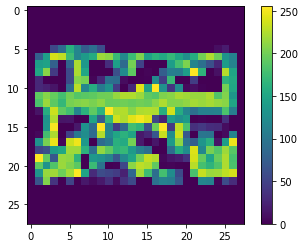

In [12]:

plt.figure()
plt.imshow(train_images[10000])
plt.colorbar()
plt.grid(False)
plt.show()

In [13]:
train_labels[10000]

8

In [14]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [15]:
train_images[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00392157, 0.        , 0.        , 0.        , 0.        ,
        0.16078431, 0.7372549 , 0.40392157, 0.21176471, 0.18823529,
        0.16862745, 0.34117647, 0.65882353, 0.52156863, 0.0627451 ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.00392157, 0.        ,
        0.        , 0.        , 0.19215686, 0.53333333, 0.85882353,
        0.84705882, 0.89411765, 0.9254902 , 1.        , 1.        ,
        1.        , 1.        , 0.85098039, 0.84313725, 0.99607843,
        0.90588235, 0.62745098, 0.17647059, 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.05490196, 0.69019608, 0.87058824, 0.87843137, 0.83137255,
        0.79607843, 0.77647059, 0.76862745, 0.78431373, 0.84313725,
        0.8       , 0.7921

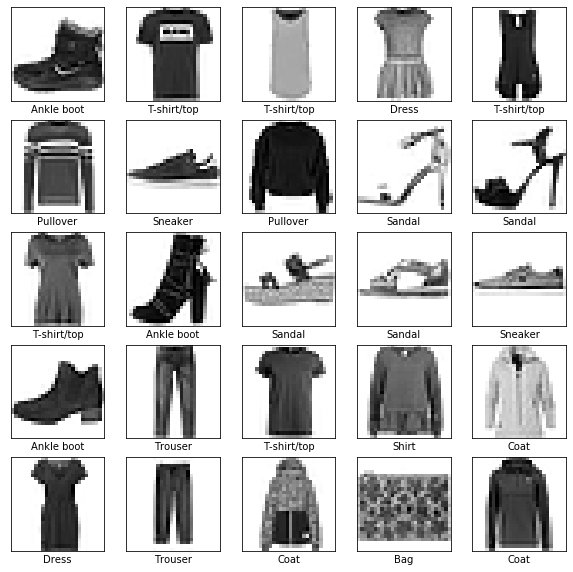

In [16]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [17]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [18]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(train_images , train_labels , epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.5018 - accuracy: 0.8242
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3792 - accuracy: 0.8643
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3389 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3119 - accuracy: 0.8845
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2956 - accuracy: 0.8917
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2817 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9002
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2567 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2466 - accuracy: 0.9079
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.239

In [20]:

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3310 - accuracy: 0.8852

Test accuracy: 0.885200023651123


In [21]:
predictions = model.predict(test_images)

In [22]:
predictions[3]

array([1.1431681e-09, 9.9999416e-01, 1.0580221e-09, 5.8868718e-06,
       1.2397292e-08, 9.9068140e-14, 1.2337935e-09, 5.7625004e-22,
       1.7356568e-11, 2.7525920e-18], dtype=float32)

In [23]:
test_labels[3]

1

In [24]:
np.argmax(predictions[0])

9

In [25]:

np.argmax(predictions[3])

1

In [26]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

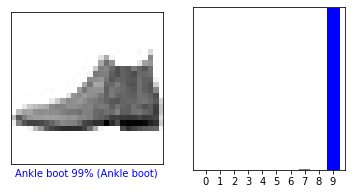

In [27]:

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

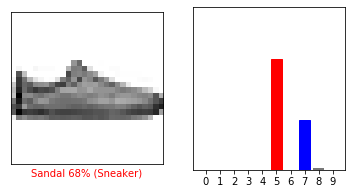

In [28]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

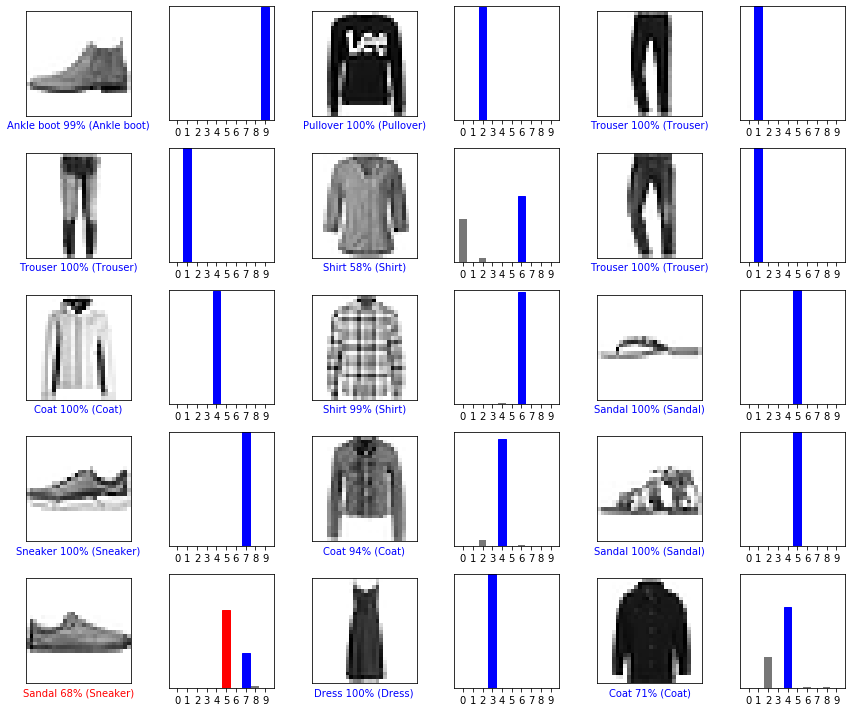

In [29]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()